In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loas data
data = pd.read_csv("ai_financial_market.csv")
print(data)

             Date Company  R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
0      2015-01-01  OpenAI                 5.92               0.63   
1      2015-01-02  OpenAI                 5.41               1.81   
2      2015-01-03  OpenAI                 4.50               0.61   
3      2015-01-04  OpenAI                 5.45               0.95   
4      2015-01-05  OpenAI                 3.40               1.48   
...           ...     ...                  ...                ...   
10954  2024-12-27    Meta               100.19             103.54   
10955  2024-12-28    Meta                99.12             102.37   
10956  2024-12-29    Meta                98.95             103.11   
10957  2024-12-30    Meta               100.74             103.21   
10958  2024-12-31    Meta               100.08             103.41   

       AI_Revenue_Growth_% Event  Stock_Impact_%  
0                   -36.82   NaN           -0.36  
1                    80.59   NaN            0.41  
2                 

In [4]:
#fst 5 rows
data.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [5]:
#check number of rows and columns
data.shape

(10959, 7)

In [6]:
#what are the columns present in dataset
data.columns

Index(['Date', 'Company', 'R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn',
       'AI_Revenue_Growth_%', 'Event', 'Stock_Impact_%'],
      dtype='object')

In [7]:
#Basic information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [8]:
#checking if there is duplicates in data set are not
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10954    False
10955    False
10956    False
10957    False
10958    False
Length: 10959, dtype: bool

In [9]:
#changing datatype of date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                233 non-null    object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


In [11]:
#we can find that Date column is now in datetime format and it does not contain
#any null values or duplicates

In [12]:
#creatinga new column with name year
data["Year"] = data["Date"].dt.year

In [13]:
data.head(2)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015


In [14]:
#cleaning columns
#we have clean only the one column named event because 
#it containing the huge number of null values

In [15]:
#list of company names
data["Company"].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [16]:
#checking for any null\missing values
data.isnull().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
Year                       0
dtype: int64

In [17]:
#list of years
data["Year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int32)

In [18]:
#count of years
data["Year"].nunique()

10

In [19]:
#list of events
data["Event"].unique()

array([nan, 'Cloud AI launch', 'AI ethics policy update',
       'AI-powered search update', 'AI Ads Optimization upgrade',
       'AI partnership deal', 'AI Video Recommendation upgrade',
       'AI speech recognition release', 'GPT-1 release', 'GPT-2 release',
       'GPT-3 release', 'Codex release', 'DALL·E 2 release',
       'ChatGPT (GPT-3.5) launch', 'GPT-4 release',
       'GPT-5 release (predicted)', 'TensorFlow open-source release',
       'AlphaGo beats Lee Sedol', 'BERT for Search launch',
       'MUM Search Model launch', 'Bard chatbot launch',
       'Gemini AI release', 'LLaMA 1 release', 'LLaMA 2 release',
       'LLaMA 3 release (predicted)'], dtype=object)

In [20]:
#count of events
data["Event"].nunique()

24

In [21]:
#count of each event
data["Event"].value_counts()

Event
AI speech recognition release      37
AI Ads Optimization upgrade        32
AI partnership deal                32
AI-powered search update           32
AI Video Recommendation upgrade    29
AI ethics policy update            27
Cloud AI launch                    27
GPT-1 release                       1
GPT-2 release                       1
GPT-3 release                       1
Codex release                       1
DALL·E 2 release                    1
ChatGPT (GPT-3.5) launch            1
GPT-4 release                       1
GPT-5 release (predicted)           1
TensorFlow open-source release      1
AlphaGo beats Lee Sedol             1
BERT for Search launch              1
MUM Search Model launch             1
Bard chatbot launch                 1
Gemini AI release                   1
LLaMA 1 release                     1
LLaMA 2 release                     1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

In [22]:
#events when gpt-1 is released
data[data["Event"] == "GPT-1 release"] #also check any other event

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
1257,2018-06-11,OpenAI,6.73,1.24,23.62,GPT-1 release,3.0,2018


In [23]:
#Questions
#1.How much amount the companies spend on R&D? in million USD
RD = data.groupby("Company")["R&D_Spending_USD_Mn"].sum()/1000
RD

Company
Google    423.34114
Meta      264.53307
OpenAI     26.48277
Name: R&D_Spending_USD_Mn, dtype: float64

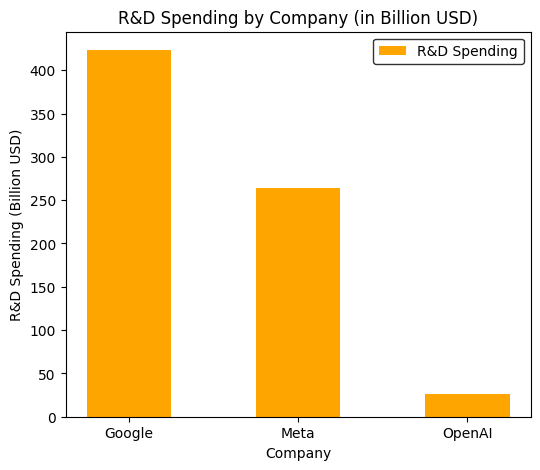

In [24]:
#bar plot for R&D spending
plt.figure(figsize=(6,5))
plt.bar(RD.index, RD.values, color="orange",label='R&D Spending',width=0.5)
plt.title('R&D Spending by Company (in Billion USD)')
plt.xlabel('Company')
plt.ylabel('R&D Spending (Billion USD)')
plt.legend(facecolor='white', edgecolor='black')
plt.show()

In [25]:
#2.revenue earned by each company
rev = data.groupby("Company")["AI_Revenue_USD_Mn"].sum()/1000
rev

Company
Google    284.49838
Meta      189.62182
OpenAI      9.46289
Name: AI_Revenue_USD_Mn, dtype: float64

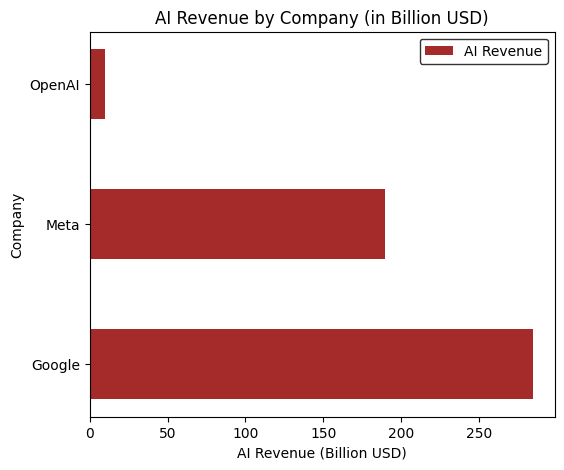

In [26]:
#histogram for revenue
plt.figure(figsize=(6,5))
plt.barh(rev.index, rev.values, color="brown",label='AI Revenue',height=0.5)
plt.title('AI Revenue by Company (in Billion USD)')
plt.xlabel('AI Revenue (Billion USD)')
plt.ylabel('Company')
plt.legend(facecolor='white', edgecolor='black')
plt.show()


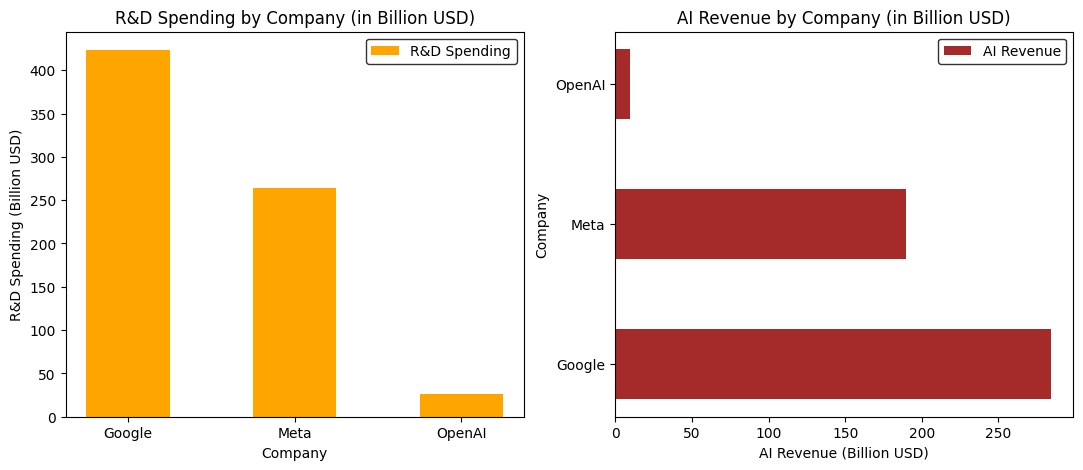

In [28]:
#sub plots on r&d spending vs ai revenue
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.bar(RD.index, RD.values, color="orange",label='R&D Spending',width=0.5)
plt.title('R&D Spending by Company (in Billion USD)')
plt.xlabel('Company')
plt.ylabel('R&D Spending (Billion USD)')
plt.legend(facecolor='white', edgecolor='black')
plt.subplot(1,2,2)
plt.barh(rev.index, rev.values, color="brown",label='AI Revenue',height=0.5)
plt.title('AI Revenue by Company (in Billion USD)') 
plt.xlabel('AI Revenue (Billion USD)')
plt.ylabel('Company')
plt.legend(facecolor='white', edgecolor='black')
plt.show()

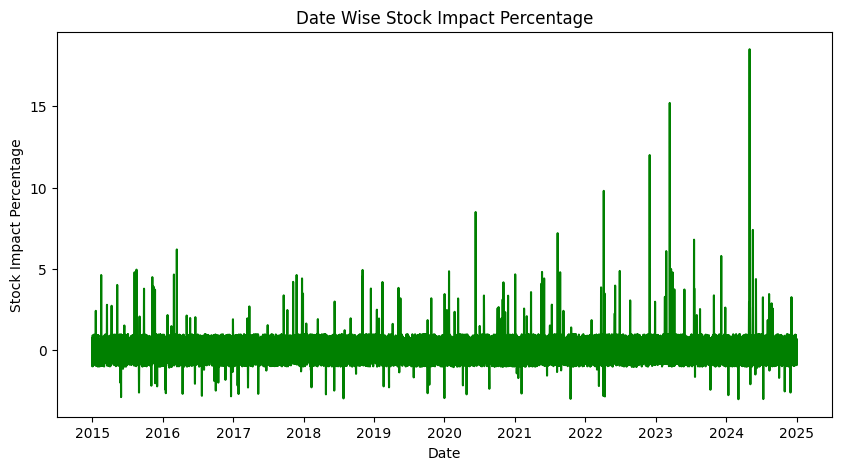

In [29]:
#3.date wise stock impact
plt.figure(figsize=(10,5))
plt.plot(data["Date"], data["Stock_Impact_%"],color='green')
plt.title('Date Wise Stock Impact Percentage')
plt.xlabel('Date')
plt.ylabel('Stock Impact Percentage')
plt.show()

In [30]:
#stock impact by each company
#4.creating 3 seperate dataframes for each company
company_A = data[data["Company"] == "OpenAI"]
company_A.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


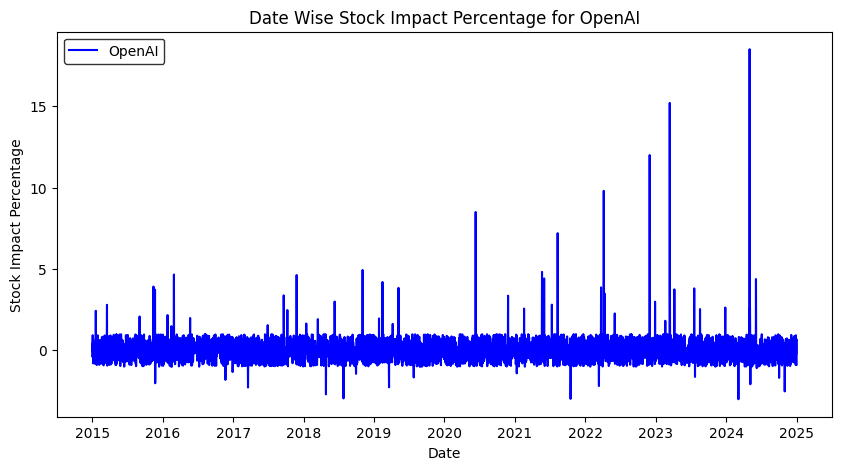

In [31]:
plt.figure(figsize=(10,5))
plt.plot(company_A["Date"], company_A["Stock_Impact_%"],color='blue',label='OpenAI')
plt.title('Date Wise Stock Impact Percentage for OpenAI')
plt.xlabel('Date')
plt.ylabel('Stock Impact Percentage')
plt.legend(facecolor='white', edgecolor='black')
plt.show()

In [32]:
company_B = data[data["Company"] == "Google"]
company_B.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3653,2015-01-01,Google,79.89,30.19,0.64,NaN,-0.02,2015
3654,2015-01-02,Google,78.99,30.44,1.47,NaN,-0.98,2015
3655,2015-01-03,Google,79.20,30.46,1.53,NaN,0.78,2015
3656,2015-01-04,Google,79.59,30.55,1.82,NaN,-0.41,2015
3657,2015-01-05,Google,81.50,30.59,1.97,NaN,-0.78,2015


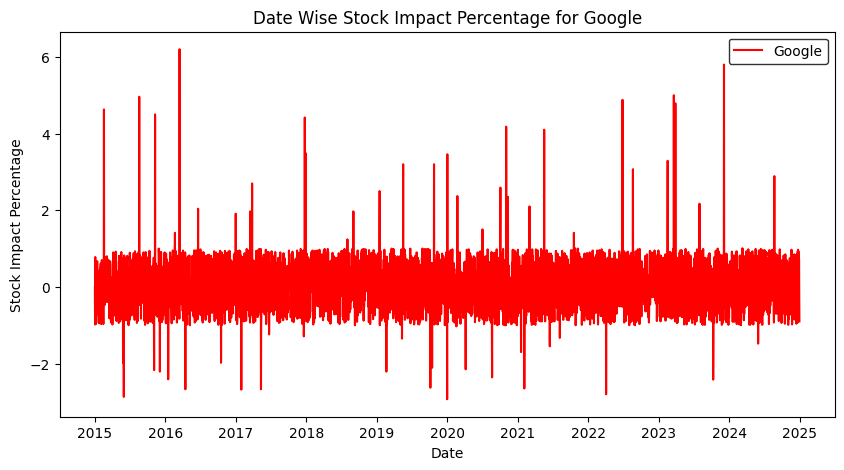

In [33]:
plt.figure(figsize=(10,5))
plt.plot(company_B["Date"], company_B["Stock_Impact_%"],color="red",label='Google')
plt.title('Date Wise Stock Impact Percentage for Google')   
plt.xlabel('Date')
plt.ylabel('Stock Impact Percentage')
plt.legend(facecolor='white', edgecolor='black')
plt.show()

In [35]:
company_C = data[data["Company"] == "Meta"]
company_C.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,2015


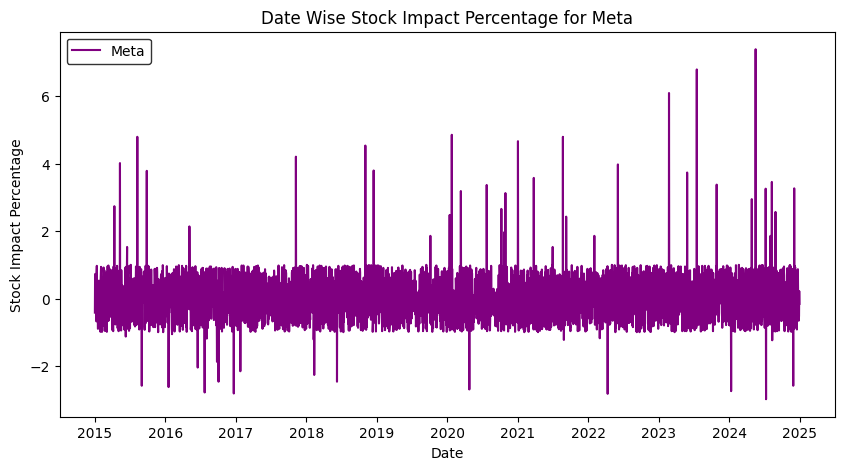

In [36]:
plt.figure(figsize=(10,5))
plt.plot(company_C["Date"], company_C["Stock_Impact_%"],color='purple',label='Meta')
plt.title('Date Wise Stock Impact Percentage for Meta')
plt.xlabel('Date')
plt.ylabel('Stock Impact Percentage')
plt.legend(facecolor='white', edgecolor='black')
plt.show()

In [37]:
data.head(2)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015


In [38]:
#5. event wise stock impact
#openAi
event_impact1 = company_A.sort_values(by="Stock_Impact_%", ascending=False)
event_impact1

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50,2024
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20,2023
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00,2022
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80,2022
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50,2020
...,...,...,...,...,...,...,...,...
3590,2024-10-30,OpenAI,11.05,5.27,427.50,AI-powered search update,-2.52,2024
1212,2018-04-27,OpenAI,5.38,1.76,76.47,AI ethics policy update,-2.70,2018
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95,2018
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98,2021


In [39]:
#Google 
event_impact2 = company_B.sort_values(by="Stock_Impact_%", ascending=False)
event_impact2

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,2022
...,...,...,...,...,...,...,...,...
4122,2016-04-14,Google,87.19,36.08,20.28,AI partnership deal,-2.67,2016
4412,2017-01-29,Google,92.21,43.25,44.17,AI Ads Optimization upgrade,-2.68,2017
6303,2022-04-04,Google,138.00,106.81,256.04,AI Video Recommendation upgrade,-2.80,2022
3803,2015-05-31,Google,81.14,29.30,-2.32,Cloud AI launch,-2.87,2015


In [40]:
#meta
event_impact3 = company_C.sort_values(by="Stock_Impact_%", ascending=False)
event_impact3

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,2020
7526,2015-08-09,Meta,48.97,19.95,-0.27,AI Video Recommendation upgrade,4.80,2015
...,...,...,...,...,...,...,...,...
10604,2024-01-12,Meta,99.37,104.28,421.42,AI Video Recommendation upgrade,-2.75,2024
7875,2016-07-23,Meta,53.76,23.97,19.83,AI-powered search update,-2.79,2016
8026,2016-12-21,Meta,53.18,23.42,17.11,AI-powered search update,-2.82,2016
9964,2022-04-12,Meta,84.90,71.99,259.95,AI ethics policy update,-2.83,2022


<module 'seaborn' from 'C:\\Users\\Ravi teja\\AppData\\Roaming\\Python\\Python313\\site-packages\\seaborn\\__init__.py'>

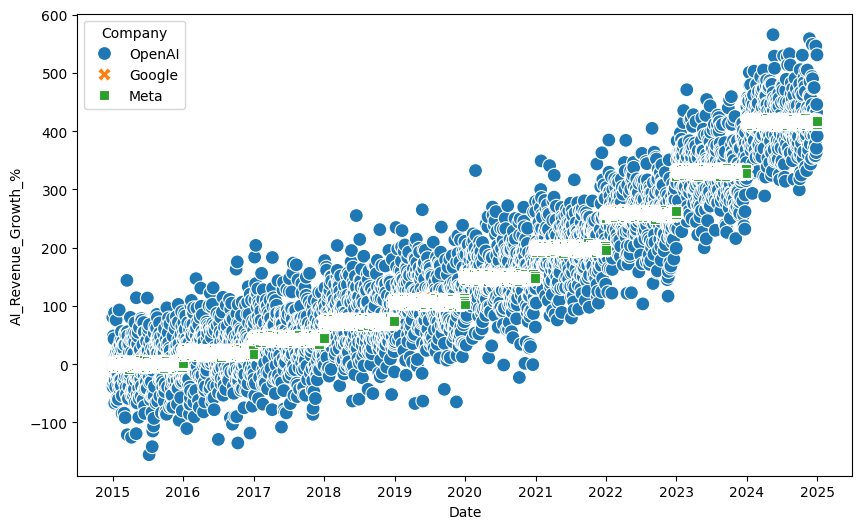

In [41]:
#6.Ai revenue growth by companies
#scatter plot for ai revenue growth
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="Date", y="AI_Revenue_Growth_%", hue="Company", s=100,
style="Company")
sns

In [42]:
data.sort_values(by="AI_Revenue_Growth_%", ascending=False)


,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3423,2024-05-16,OpenAI,8.47,6.65,565.50,NaN,0.51,2024
3612,2024-11-21,OpenAI,10.16,6.59,558.70,NaN,0.63,2024
3627,2024-12-06,OpenAI,8.51,6.49,548.83,NaN,-0.15,2024
3645,2024-12-24,OpenAI,8.79,6.46,546.07,NaN,0.45,2024
3508,2024-08-09,OpenAI,9.92,6.33,532.86,NaN,0.77,2024
...,...,...,...,...,...,...,...,...
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,NaN,-0.56,2015
548,2016-07-02,OpenAI,5.19,-0.29,-129.11,NaN,-0.31,2016
649,2016-10-11,OpenAI,5.37,-0.35,-135.31,NaN,0.12,2016
205,2015-07-25,OpenAI,5.23,-0.42,-141.61,NaN,-0.62,2015


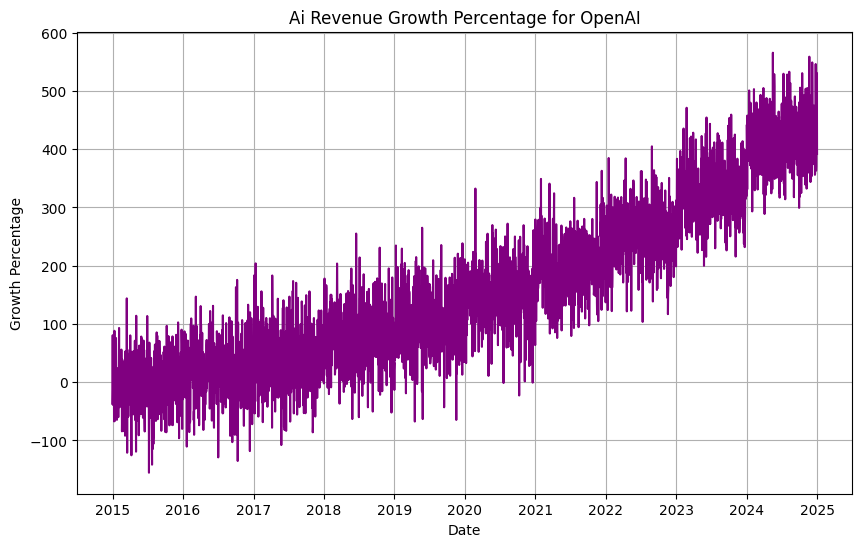

In [44]:
#8.AI_Revenue_Growth_% year by year
#open ai
plt.figure(figsize=(10,6))
plt.plot(company_A["Date"],company_A["AI_Revenue_Growth_%"],color='purple')
plt.grid()
plt.xlabel("Date")
plt.ylabel("Growth Percentage")
plt.title("Ai Revenue Growth Percentage for OpenAI")
plt.show()

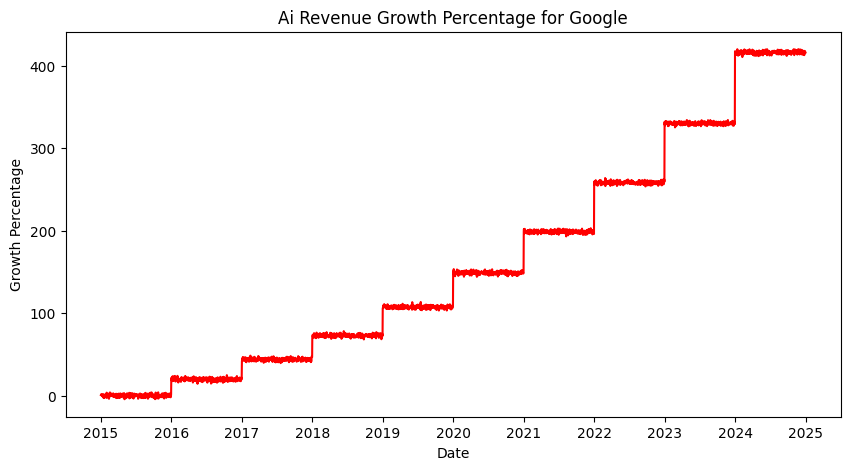

In [45]:
#Google
plt.figure(figsize=(10,5))
plt.plot(company_B["Date"],company_B["AI_Revenue_Growth_%"],color='red')
plt.xlabel("Date")
plt.ylabel("Growth Percentage")
plt.title("Ai Revenue Growth Percentage for Google")
plt.show()

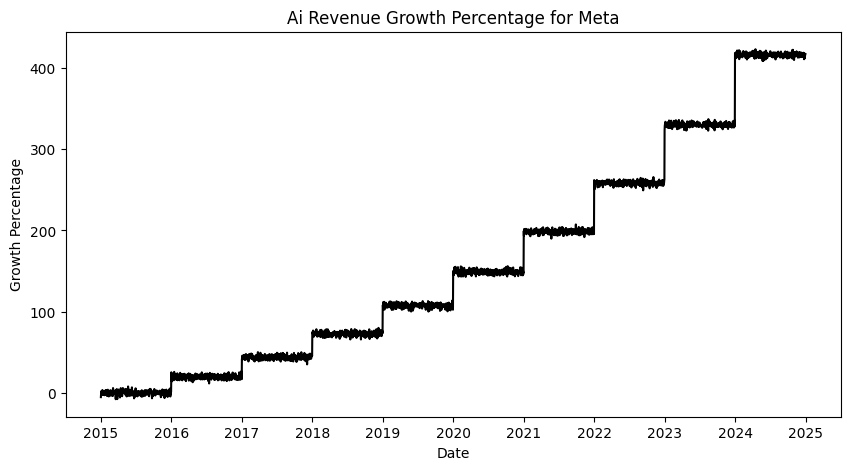

In [46]:
#meta
plt.figure(figsize=(10,5))
plt.plot(company_C["Date"],company_C["AI_Revenue_Growth_%"],color='black')
plt.xlabel("Date")
plt.ylabel("Growth Percentage")
plt.title("Ai Revenue Growth Percentage for Meta")
plt.show()

In [47]:
#9.correlation between columns
data.corr(numeric_only=True)

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year
R&D_Spending_USD_Mn,1.000000,0.935030,0.291245,-0.004628,0.297701
AI_Revenue_USD_Mn,0.935030,1.000000,0.530128,-0.000017,0.526478
AI_Revenue_Growth_%,0.291245,0.530128,1.000000,0.020937,0.952199
Stock_Impact_%,-0.004628,-0.000017,0.020937,1.000000,0.016525
Year,0.297701,0.526478,0.952199,0.016525,1.000000


<Axes: >

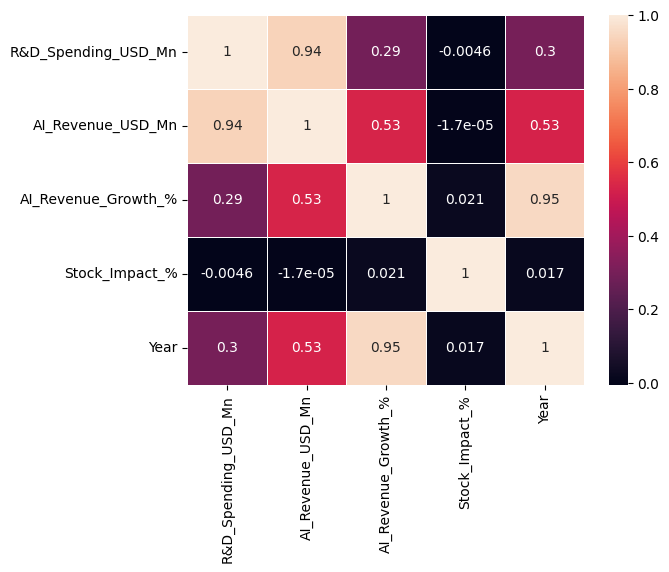

In [48]:
sns.heatmap(data.corr(numeric_only=True), annot=True,linewidths=0.5)

In [49]:
#9.expenditure vs revenue year by year
spend = data.groupby("Year")["R&D_Spending_USD_Mn"].sum()
spend

Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

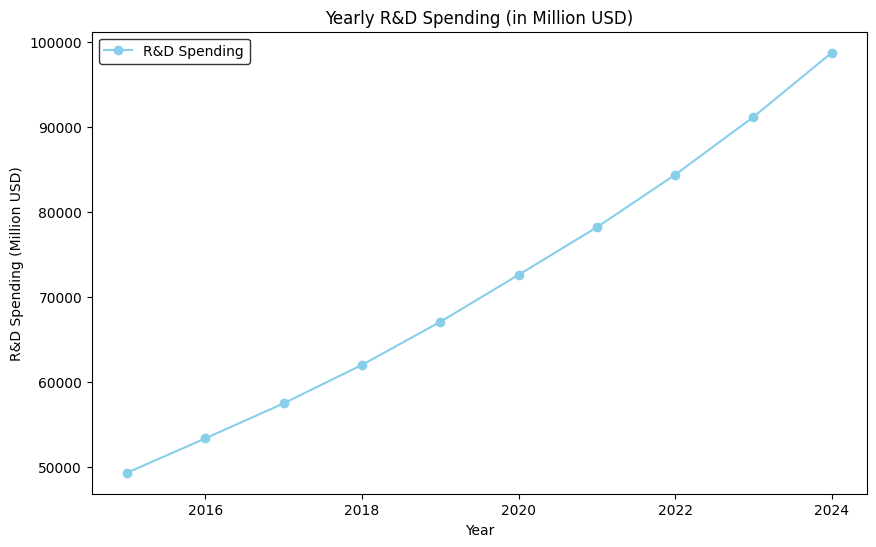

In [50]:
#plot
plt.figure(figsize=(10,6))
plt.plot(spend.index, spend.values, color='skyblue', marker='o', label='R&D Spending')
plt.title('Yearly R&D Spending (in Million USD)')
plt.xlabel('Year')
plt.ylabel('R&D Spending (Million USD)')   
plt.legend(facecolor='white', edgecolor='black') 
plt.show()

In [52]:
revenue = data.groupby("Year")["AI_Revenue_USD_Mn"].sum()
revenue

Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64

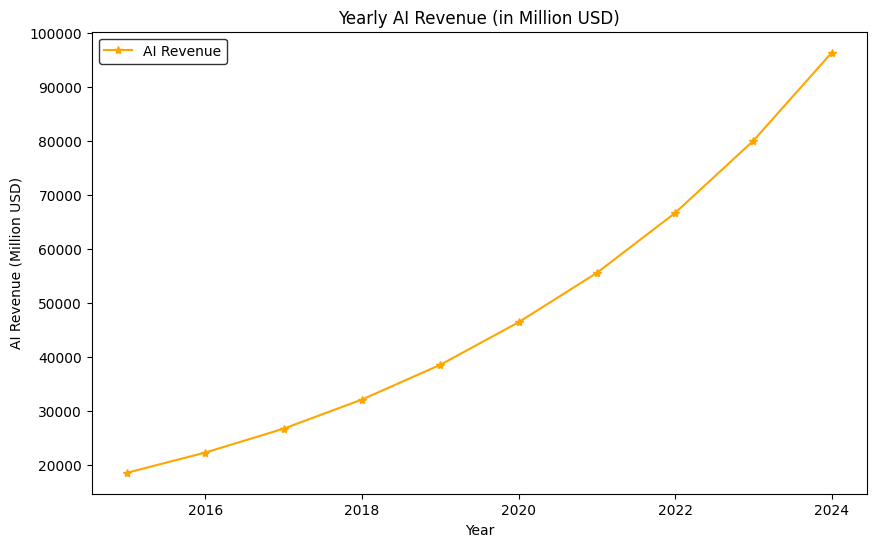

In [57]:
#plot
plt.figure(figsize=(10,6))
plt.plot(revenue.index, revenue.values, color='orange', marker='*', label='AI Revenue')
plt.title('Yearly AI Revenue (in Million USD)')
plt.xlabel('Year')
plt.ylabel('AI Revenue (Million USD)')
plt.legend(facecolor='white', edgecolor='black')
plt.show()

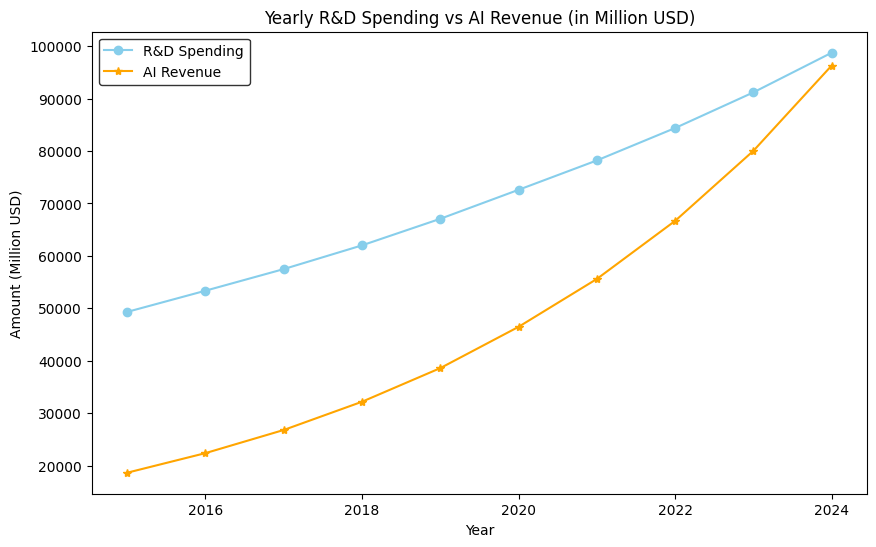

In [58]:
#both in single plot
plt.figure(figsize=(10,6))
plt.plot(spend.index, spend.values, color='skyblue', marker='o', label='R&D Spending')
plt.plot(revenue.index, revenue.values, color='orange', marker='*', label='AI Revenue')
plt.title('Yearly R&D Spending vs AI Revenue (in Million USD)')
plt.xlabel('Year')
plt.ylabel('Amount (Million USD)')
plt.legend(facecolor='white', edgecolor='black')
plt.show()

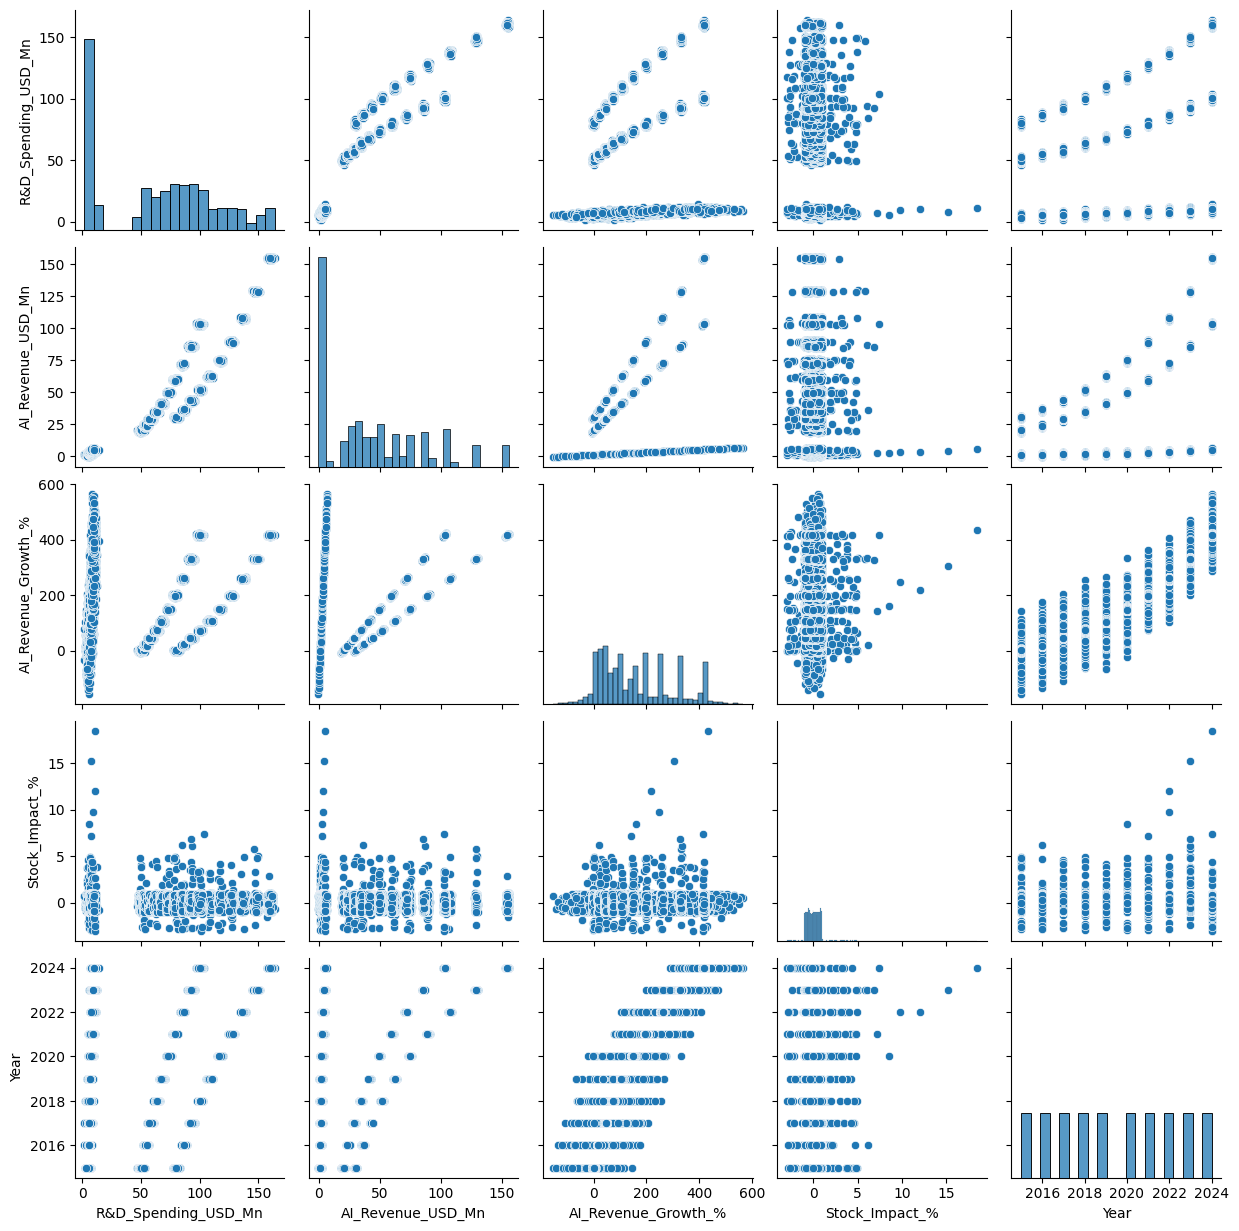

In [62]:
#pairplot to see relationships between columns
sns.pairplot(data = data)

In [63]:
#11.event impact analysis
data.Event.value_counts()

Event
AI speech recognition release      37
AI Ads Optimization upgrade        32
AI partnership deal                32
AI-powered search update           32
AI Video Recommendation upgrade    29
AI ethics policy update            27
Cloud AI launch                    27
GPT-1 release                       1
GPT-2 release                       1
GPT-3 release                       1
Codex release                       1
DALL·E 2 release                    1
ChatGPT (GPT-3.5) launch            1
GPT-4 release                       1
GPT-5 release (predicted)           1
TensorFlow open-source release      1
AlphaGo beats Lee Sedol             1
BERT for Search launch              1
MUM Search Model launch             1
Bard chatbot launch                 1
Gemini AI release                   1
LLaMA 1 release                     1
LLaMA 2 release                     1
LLaMA 3 release (predicted)         1
Name: count, dtype: int64

In [72]:
#checking for particular event
data[data["Event"] == "TensorFlow open-source release"]


,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3965,2015-11-09,Google,79.62,29.84,-0.53,TensorFlow open-source release,4.5,2015


In [73]:
#befor and after 10 rows of events when TensorFlow open-source release
evnts = data.loc[3955:3975]
evnts

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3955,2015-10-30,Google,80.33,29.87,-0.43,NaN,0.43,2015
3956,2015-10-31,Google,79.53,30.30,0.99,NaN,-0.84,2015
3957,2015-11-01,Google,80.37,29.86,-0.48,NaN,0.57,2015
3958,2015-11-02,Google,77.89,29.97,-0.10,NaN,0.76,2015
3959,2015-11-03,Google,81.00,29.43,-1.89,NaN,-0.45,2015
3960,2015-11-04,Google,80.70,29.71,-0.96,AI speech recognition release,-2.17,2015
3961,2015-11-05,Google,78.31,30.25,0.85,NaN,0.31,2015
3962,2015-11-06,Google,79.08,29.84,-0.54,NaN,-0.72,2015
3963,2015-11-07,Google,79.65,30.34,1.14,NaN,0.58,2015
3964,2015-11-08,Google,79.63,29.74,-0.86,NaN,-0.61,2015


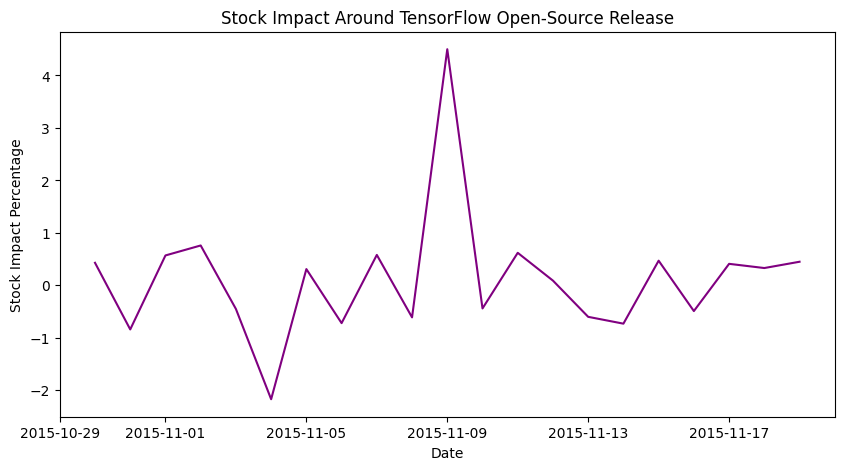

In [78]:
#stock impact around the event
plt.figure(figsize=(10,5))
plt.plot(evnts["Date"], evnts["Stock_Impact_%"],color = "purple")
plt.title('Stock Impact Around TensorFlow Open-Source Release')
plt.xlabel('Date')
plt.ylabel('Stock Impact Percentage')
plt.show()

In [80]:
#checking particular event impact
data[data["Event"] == "GPT-4 release"]

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.2,2023


In [82]:
bf = data.loc[2984:3004]
bf

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
2984,2023-03-04,OpenAI,10.59,4.26,326.43,NaN,-0.28,2023
2985,2023-03-05,OpenAI,8.24,3.58,257.92,NaN,-0.48,2023
2986,2023-03-06,OpenAI,9.32,4.21,320.60,NaN,0.89,2023
2987,2023-03-07,OpenAI,8.52,4.13,313.16,NaN,-0.08,2023
2988,2023-03-08,OpenAI,8.90,3.63,263.03,NaN,-0.56,2023
2989,2023-03-09,OpenAI,8.44,4.64,363.84,NaN,0.91,2023
2990,2023-03-10,OpenAI,9.55,4.83,383.49,NaN,-0.02,2023
2991,2023-03-11,OpenAI,8.34,3.95,294.67,NaN,0.19,2023
2992,2023-03-12,OpenAI,8.71,3.57,256.88,NaN,-0.87,2023
2993,2023-03-13,OpenAI,10.61,5.19,419.06,NaN,0.53,2023


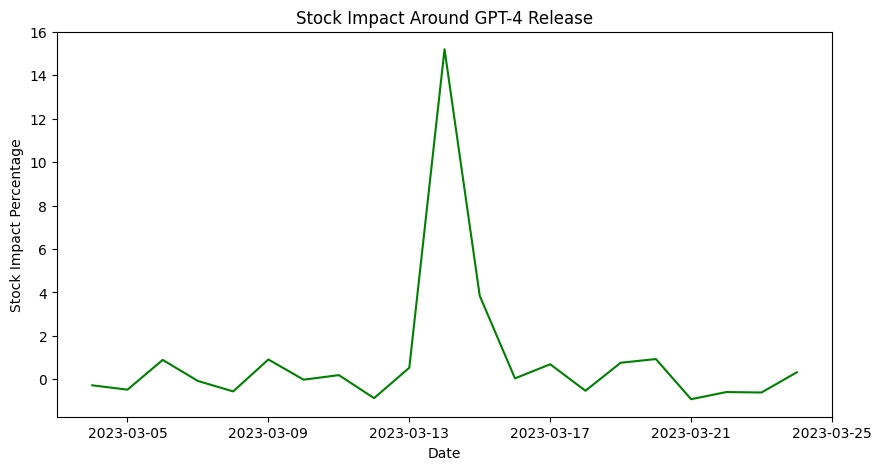

In [85]:
#plot
plt.figure(figsize=(10,5))
plt.plot(bf["Date"], bf["Stock_Impact_%"], color='green')
plt.title('Stock Impact Around GPT-4 Release')
plt.xlabel('Date')
plt.ylabel('Stock Impact Percentage')
plt.show()

In [88]:
#12.daily average impact on stocks of the companies
data.groupby("Company")["Stock_Impact_%"].mean()*100

Company
Google    2.620860
Meta      0.976184
OpenAI    4.070901
Name: Stock_Impact_%, dtype: float64

In [89]:
#13.daily average R&D spending by companies
data.groupby("Company")["R&D_Spending_USD_Mn"].mean()

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

In [91]:
#14.maximum stock impact event for each company
data.groupby("Company")["Stock_Impact_%"].max().sort_values(ascending=False)

Company
OpenAI    18.5
Meta       7.4
Google     6.2
Name: Stock_Impact_%, dtype: float64

In [96]:
#15.change in index through year and company
index = data.groupby(["Year","Company"])["Stock_Impact_%"].max()   
index

Year  Company
2015  Google      4.96
      Meta        4.80
      OpenAI      3.92
2016  Google      6.20
      Meta        2.14
      OpenAI      4.66
2017  Google      4.42
      Meta        4.21
      OpenAI      4.63
2018  Google      1.97
      Meta        4.54
      OpenAI      4.94
2019  Google      3.20
      Meta        1.86
      OpenAI      4.20
2020  Google      4.18
      Meta        4.86
      OpenAI      8.50
2021  Google      4.10
      Meta        4.80
      OpenAI      7.20
2022  Google      4.88
      Meta        3.98
      OpenAI     12.00
2023  Google      5.80
      Meta        6.80
      OpenAI     15.20
2024  Google      2.89
      Meta        7.40
      OpenAI     18.50
Name: Stock_Impact_%, dtype: float64

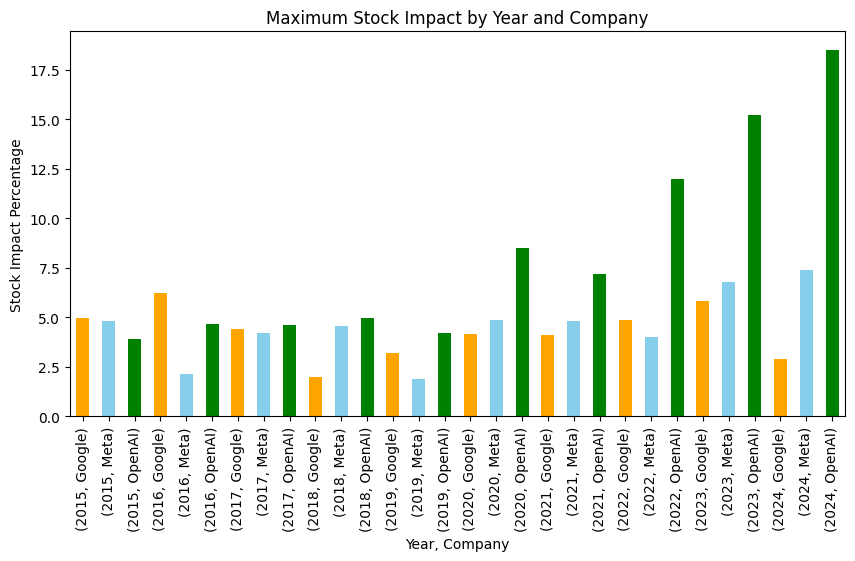

In [112]:
plt.figure(figsize=(10,5))
index.plot(kind = "bar",color=["orange","skyblue","green"])
plt.title('Maximum Stock Impact by Year and Company')
plt.xlabel('Year, Company')
plt.ylabel('Stock Impact Percentage')
plt.show()

